## Single Graph


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from collections import defaultdict

def format_number(value):
    if value >= 1_000_000:
        return f'{value/1_000_000:.1f}M'
    elif value >= 1_000:
        return f'{value/1_000:.1f}K'
    return f'{value:.0f}'

def group_files_by_pattern(files):
    pattern_groups = defaultdict(list)
    for file in files:
        pattern = re.sub(r'\d+(?:\.\d+)?', '#', file)  # substitute integers and decimals with '#'
        pattern_groups[pattern].append(file)
    return pattern_groups

In [9]:

def plot_total_execution_and_memory(csv_file):
    df = pd.read_csv(csv_file)
    df['total_execution_time'] = df['descriptor_time'] + df['graph_time']
    df['peak_memory_usage'] = df[['graph_mem', 'descriptor_mem']].max(axis=1)
    
    pattern_groups = group_files_by_pattern(df['Test File'])
    
    for pattern, files in pattern_groups.items():
        subset = df[df['Test File'].isin(files)].copy()
        subset['size'] = subset['Test File'].str.extract(r'(\d+)').astype(int)
        subset.sort_values('size', inplace=True)
        
        plt.figure(figsize=(12, 10))
        
        # Execution Time Plot
        ax1 = plt.subplot(2, 1, 1)
        ax1.plot(subset['Test File'], subset['total_execution_time'], marker='o', linestyle='-', color='blue', label='Total Execution Time (s)')
        for i, txt in enumerate(subset['total_execution_time']):
            ax1.text(i, txt + max(subset['total_execution_time']) * 0.02, f'{txt:.2f}', ha='center', fontsize=9)
        plt.xlabel('Test Files')
        plt.ylabel('Time (s)')
        plt.title(f'Total Execution Time - {pattern}')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        
        # Memory Usage Plot
        ax2 = plt.subplot(2, 1, 2)
        ax2.plot(subset['Test File'], subset['peak_memory_usage'], marker='s', linestyle='-', color='green', label='Peak Memory Usage (bytes)')
        for i, txt in enumerate(subset['peak_memory_usage']):
            ax2.text(i, txt + max(subset['peak_memory_usage']) * 0.02, format_number(txt), ha='center', fontsize=9)
        plt.xlabel('Test Files')
        plt.ylabel('Memory Usage (bytes)')
        plt.title(f'Peak Memory Usage - {pattern}')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)

        plt.tight_layout(pad=2.0)

        plt.show()



In [10]:
def plot_stepwise_execution_and_memory(csv_file):
    df = pd.read_csv(csv_file)

    # grouping 
    pattern_groups = group_files_by_pattern(df['Test File'])

    for pattern, files in pattern_groups.items():
        subset = df[df['Test File'].isin(files)].copy()
        subset['size'] = subset['Test File'].str.extract(r'(\d+)').astype(float)
        subset.sort_values('size', inplace=True)  # sorting 

        num_files = len(subset)  # number of the files in specific pattern
        cols = 2  # 2 graphs in 1 line
        rows = num_files  

        print(f"Pattern: {pattern}, Total files: {num_files}, Rows: {rows}, Cols: {cols}")

        fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4), squeeze=False)

        bar_width = 0.4

        for i, (_, row) in enumerate(subset.iterrows()):
            row_idx = i  
            col_idx = 0  
            
            print(f"Processing file {row['Test File']} at row {row_idx}")

            # Execution Time Graph
            ax_time = axes[row_idx, col_idx]
            x = np.array([0, 1])  # Graph, Descriptor 
            times = [row['graph_time'], row['descriptor_time']]  

            ax_time.bar(x, times, bar_width, color=['blue', 'red'])
            for j in range(2):
                ax_time.text(x[j], times[j] + max(times) * 0.05, f'{times[j]:.2f}', ha='center', fontsize=9)

            ax_time.set_xticks(x)
            ax_time.set_xticklabels(['Graph', 'Descriptor'])
            ax_time.set_title(f'Time - {row["Test File"]}')
            ax_time.set_ylabel('Time (s)')
            ax_time.grid(True)

            # Memory Usage Graph
            col_idx = 1  
            ax_mem = axes[row_idx, col_idx]
            mems = [row['graph_mem'], row['descriptor_mem']]

            ax_mem.bar(x, mems, bar_width, color=['green', 'purple'])
            for j in range(2):
                ax_mem.text(x[j], mems[j] + max(mems) * 0.05, format_number(mems[j]), ha='center', fontsize=9)

            ax_mem.set_xticks(x)
            ax_mem.set_xticklabels(['Graph', 'Descriptor'])
            ax_mem.set_title(f'Memory - {row["Test File"]}')
            ax_mem.set_ylabel('Memory Usage (bytes)')
            ax_mem.grid(True)

        plt.tight_layout()
        plt.show()

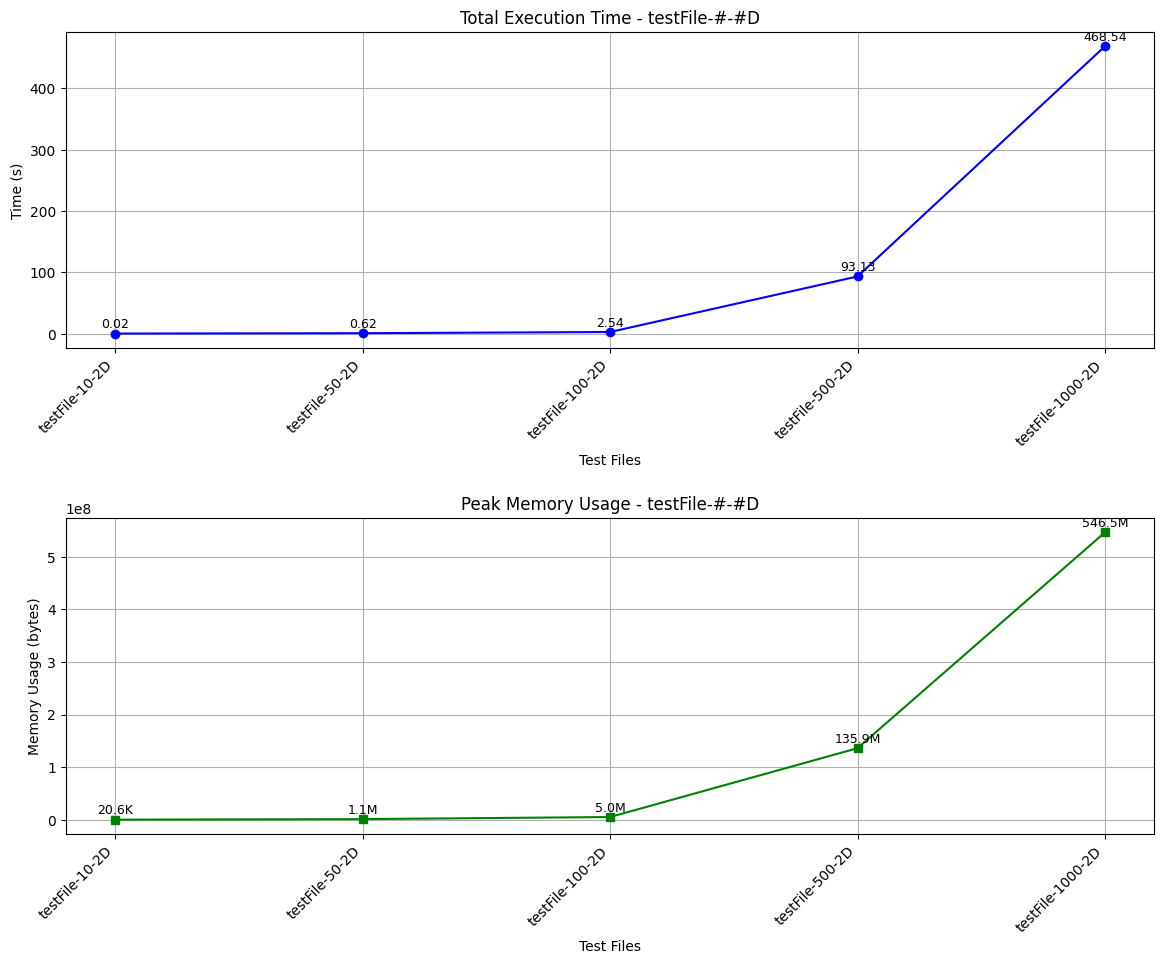

/var/folders/n1/qgmyk_w56dvcbfgpn3q2f7m00000gn/T/ipykernel_17934/197892507.py:37: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(pad=2.0)


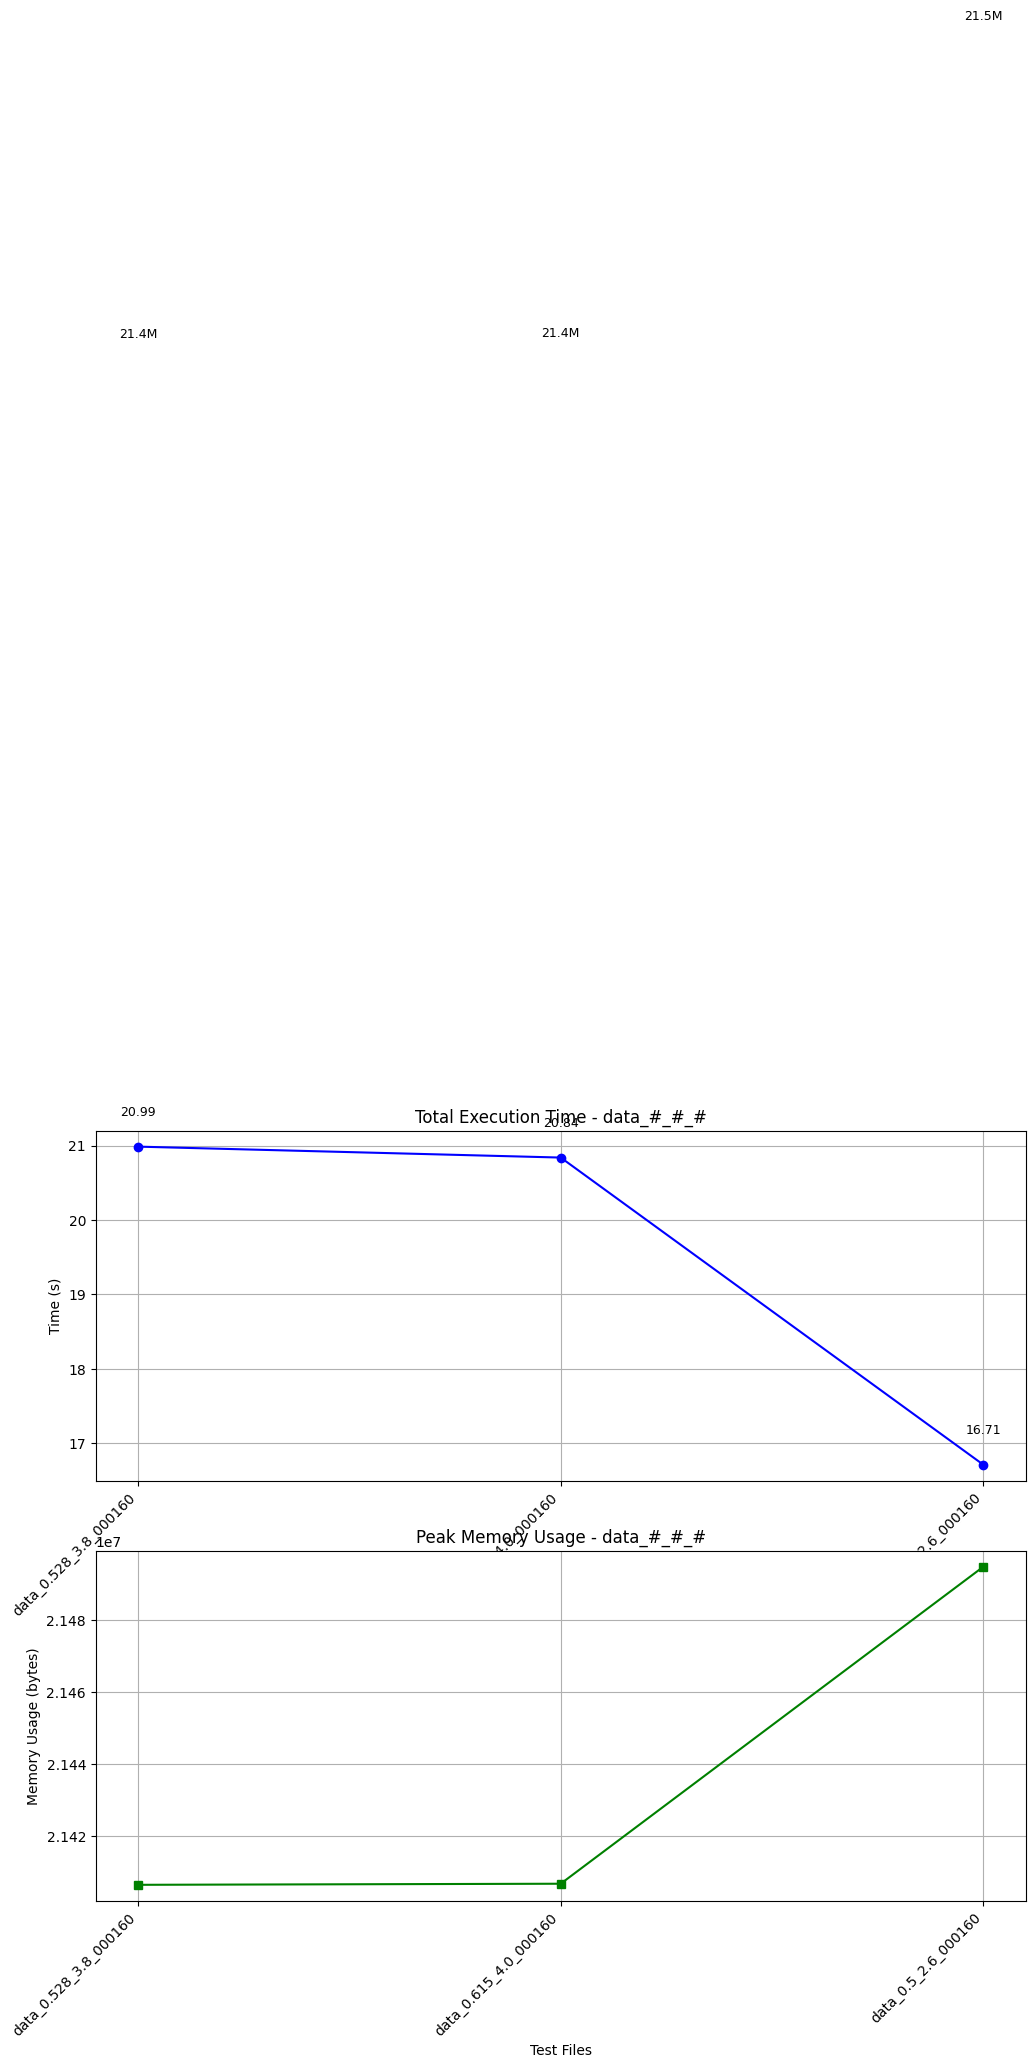

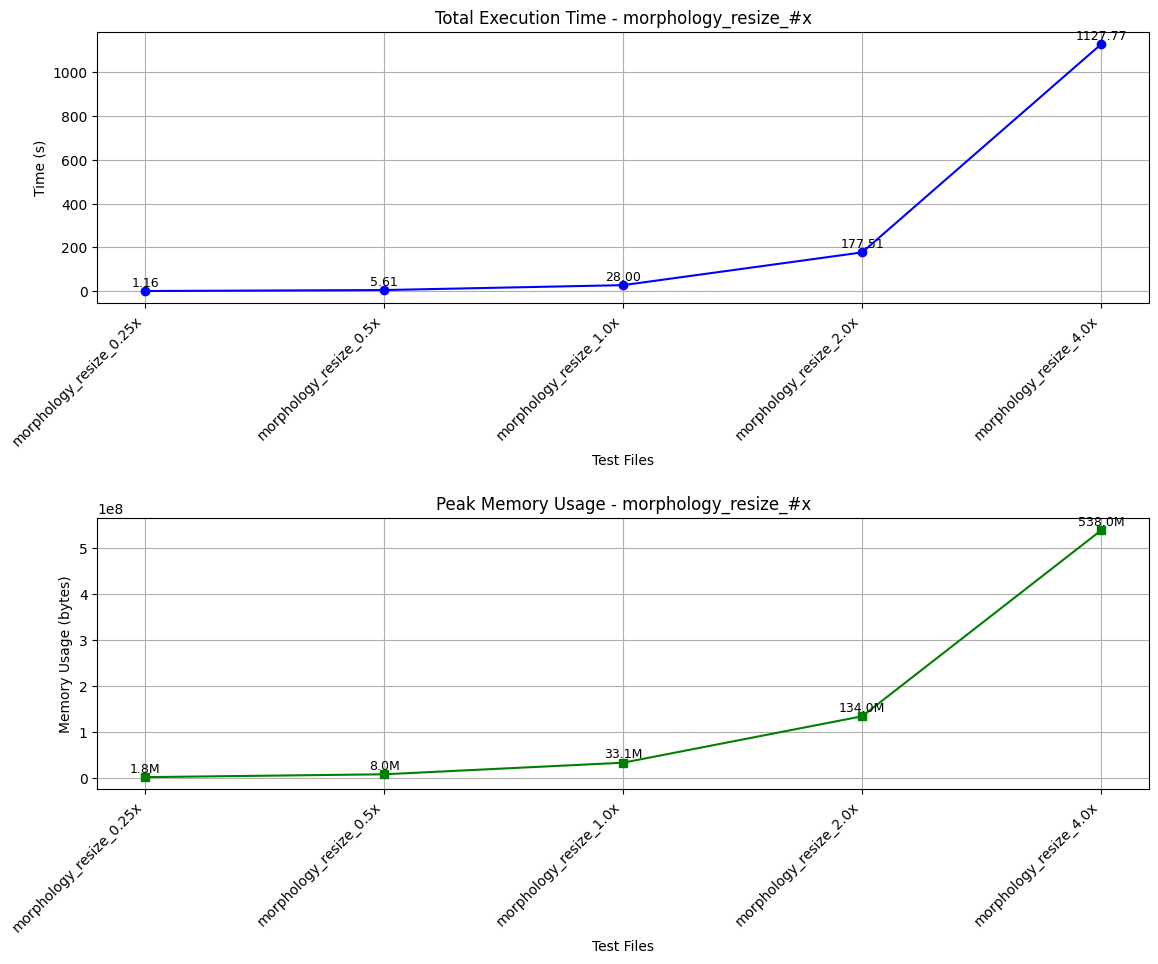

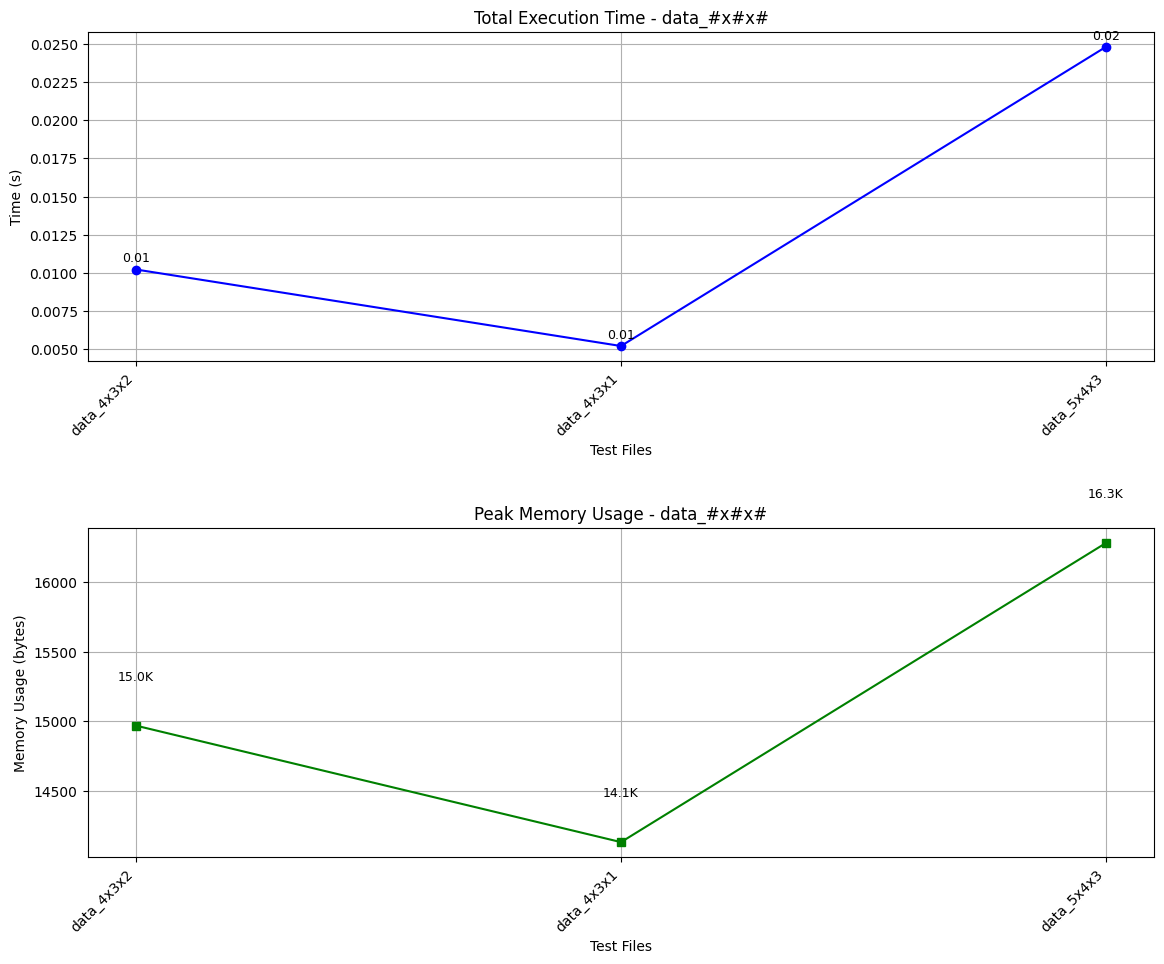

Pattern: testFile-#-#D, Total files: 5, Rows: 5, Cols: 2
Processing file testFile-10-2D at row 0
Processing file testFile-50-2D at row 1
Processing file testFile-100-2D at row 2
Processing file testFile-500-2D at row 3
Processing file testFile-1000-2D at row 4


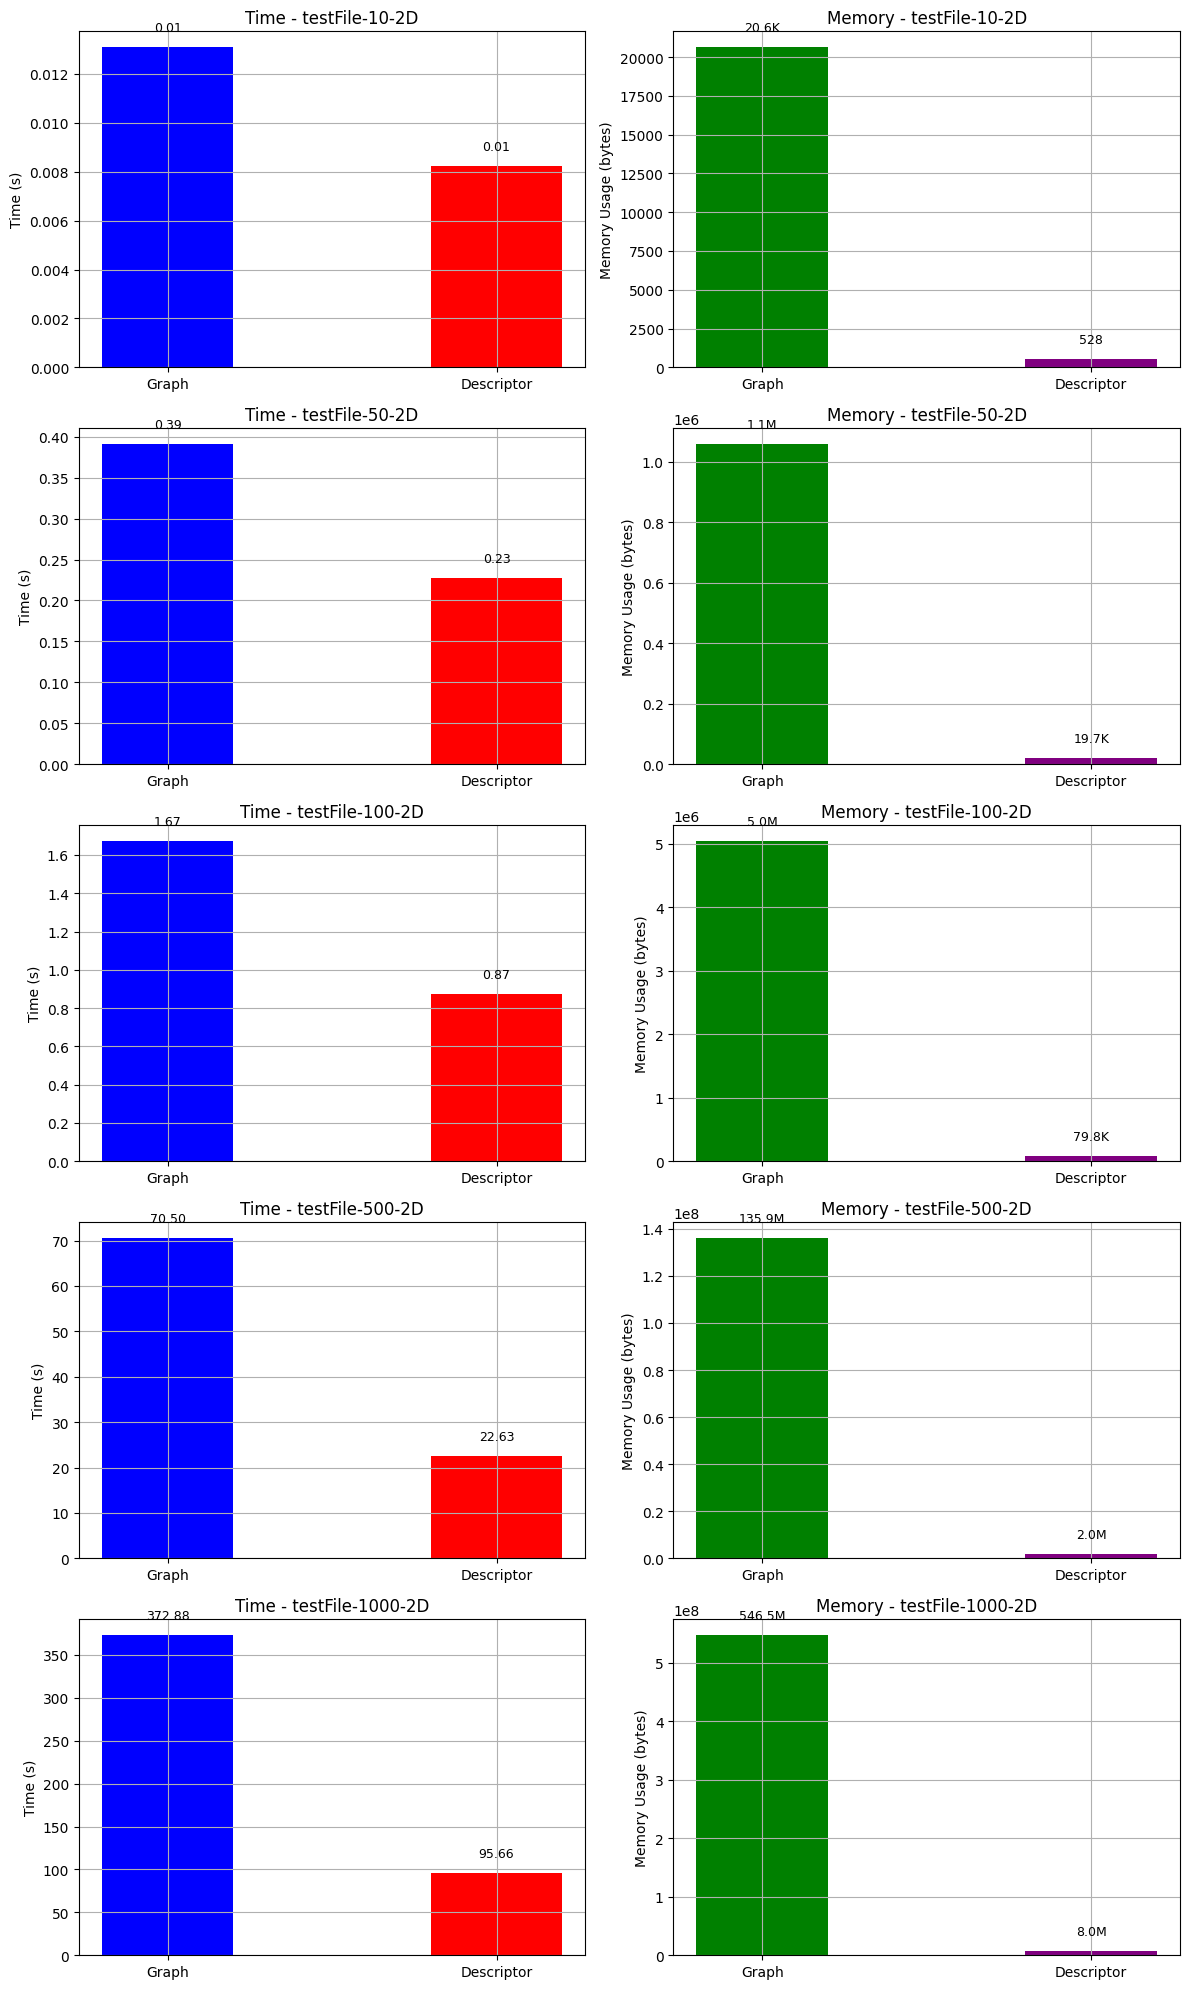

Pattern: data_#_#_#, Total files: 3, Rows: 3, Cols: 2
Processing file data_0.528_3.8_000160 at row 0
Processing file data_0.615_4.0_000160 at row 1
Processing file data_0.5_2.6_000160 at row 2


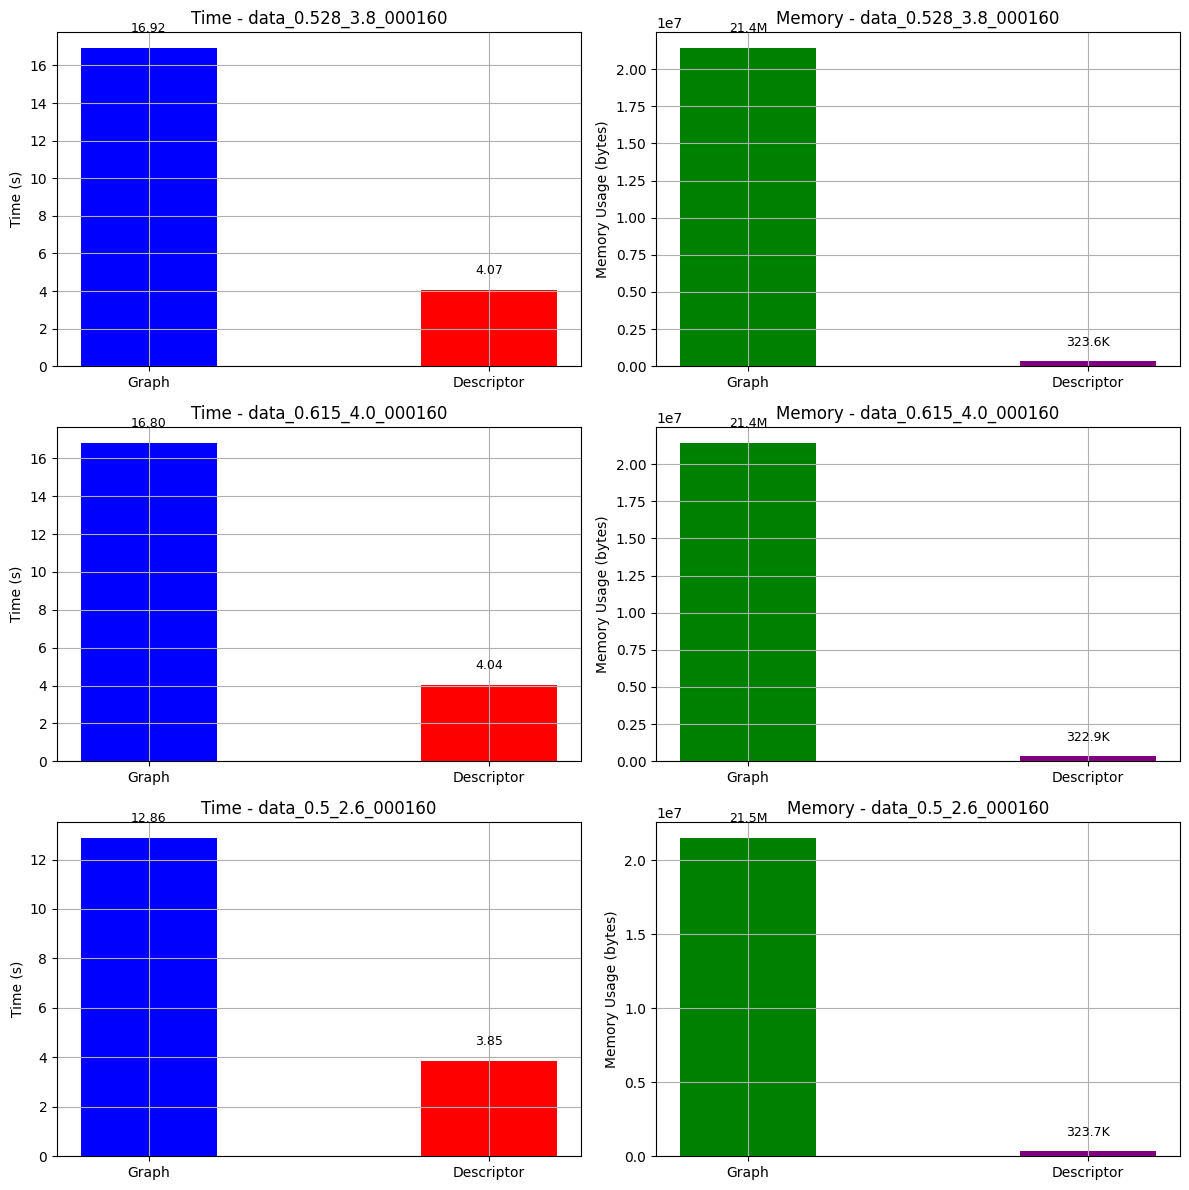

Pattern: morphology_resize_#x, Total files: 5, Rows: 5, Cols: 2
Processing file morphology_resize_0.25x at row 0
Processing file morphology_resize_0.5x at row 1
Processing file morphology_resize_1.0x at row 2
Processing file morphology_resize_2.0x at row 3
Processing file morphology_resize_4.0x at row 4


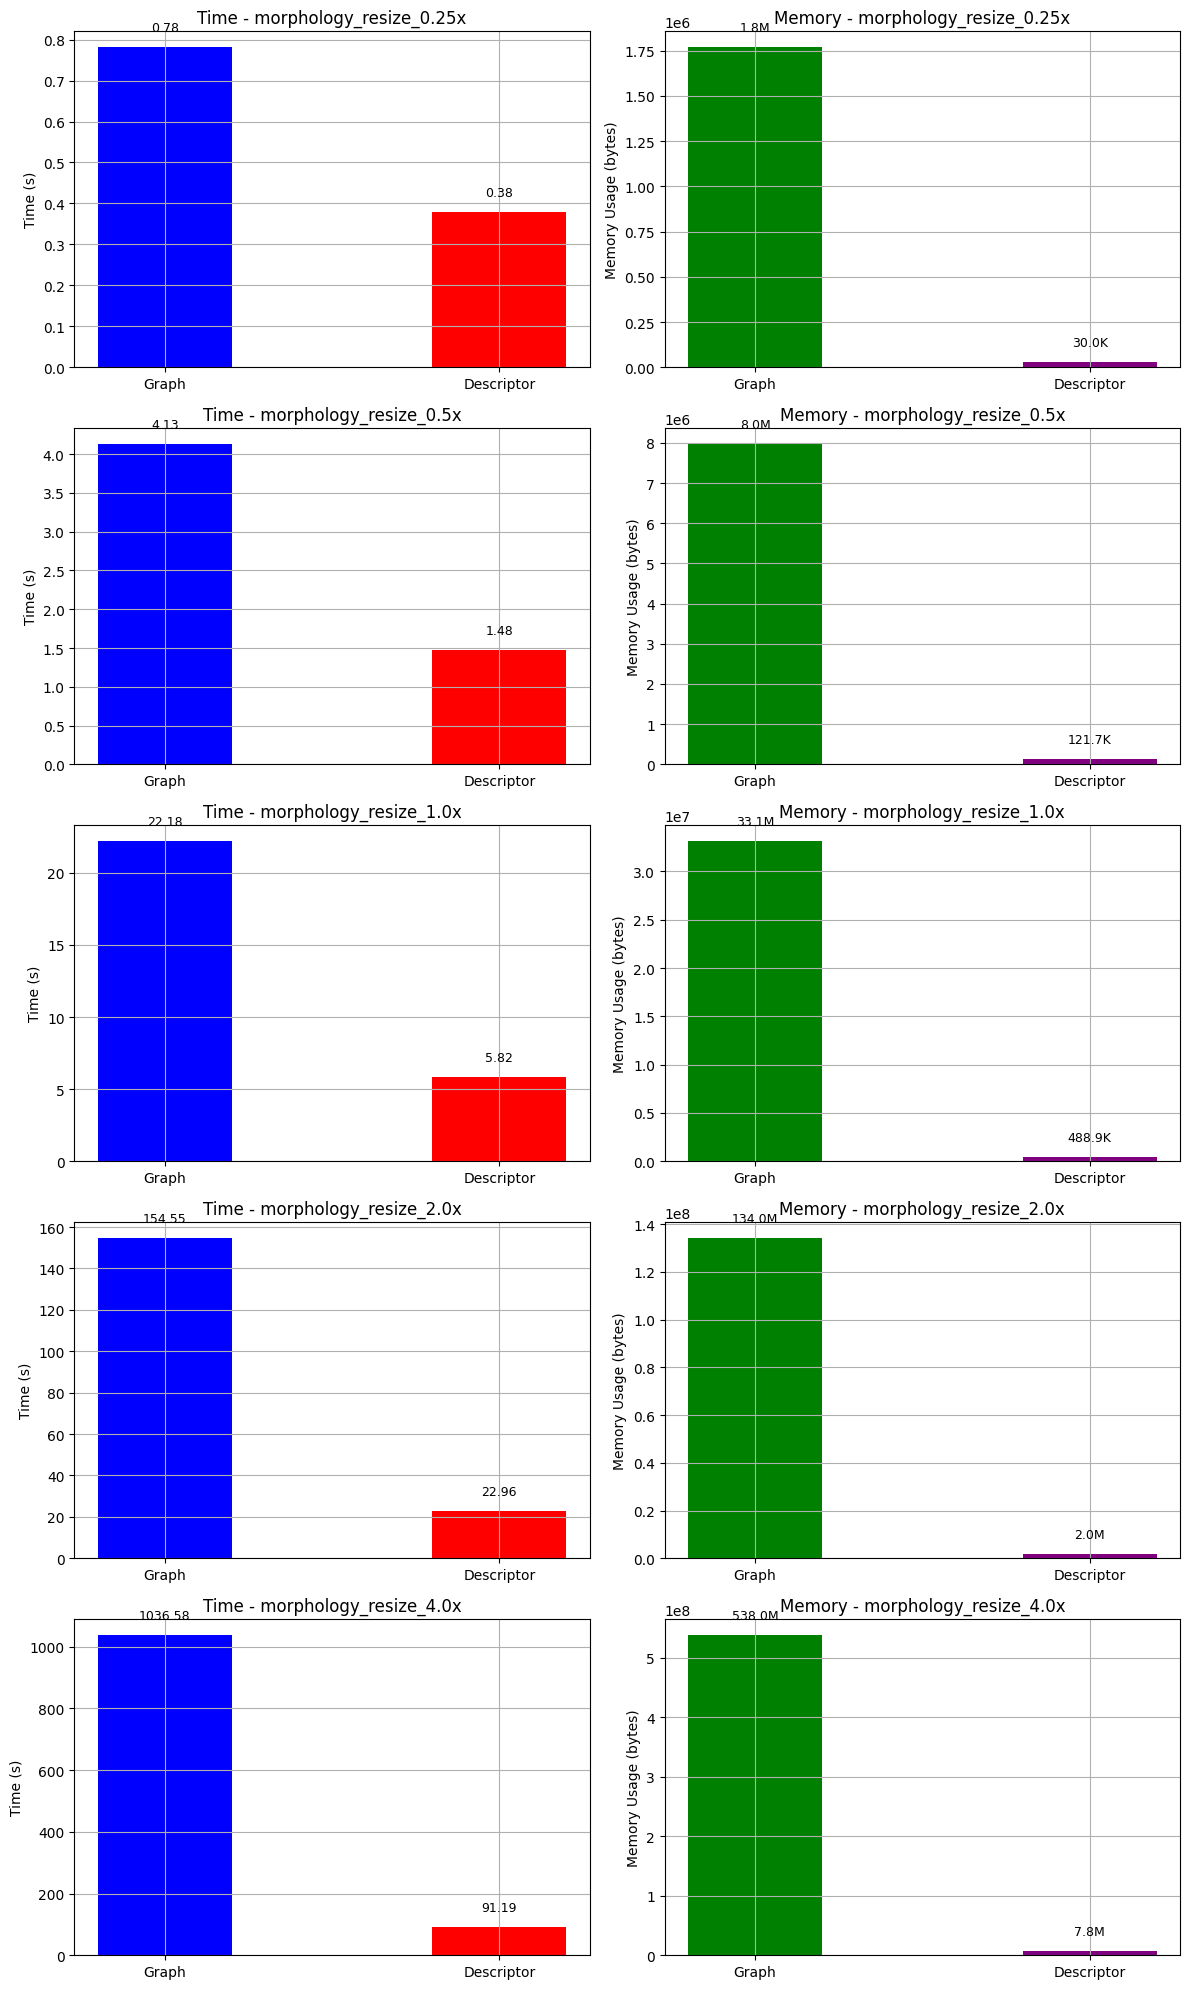

Pattern: data_#x#x#, Total files: 3, Rows: 3, Cols: 2
Processing file data_4x3x2 at row 0
Processing file data_4x3x1 at row 1
Processing file data_5x4x3 at row 2


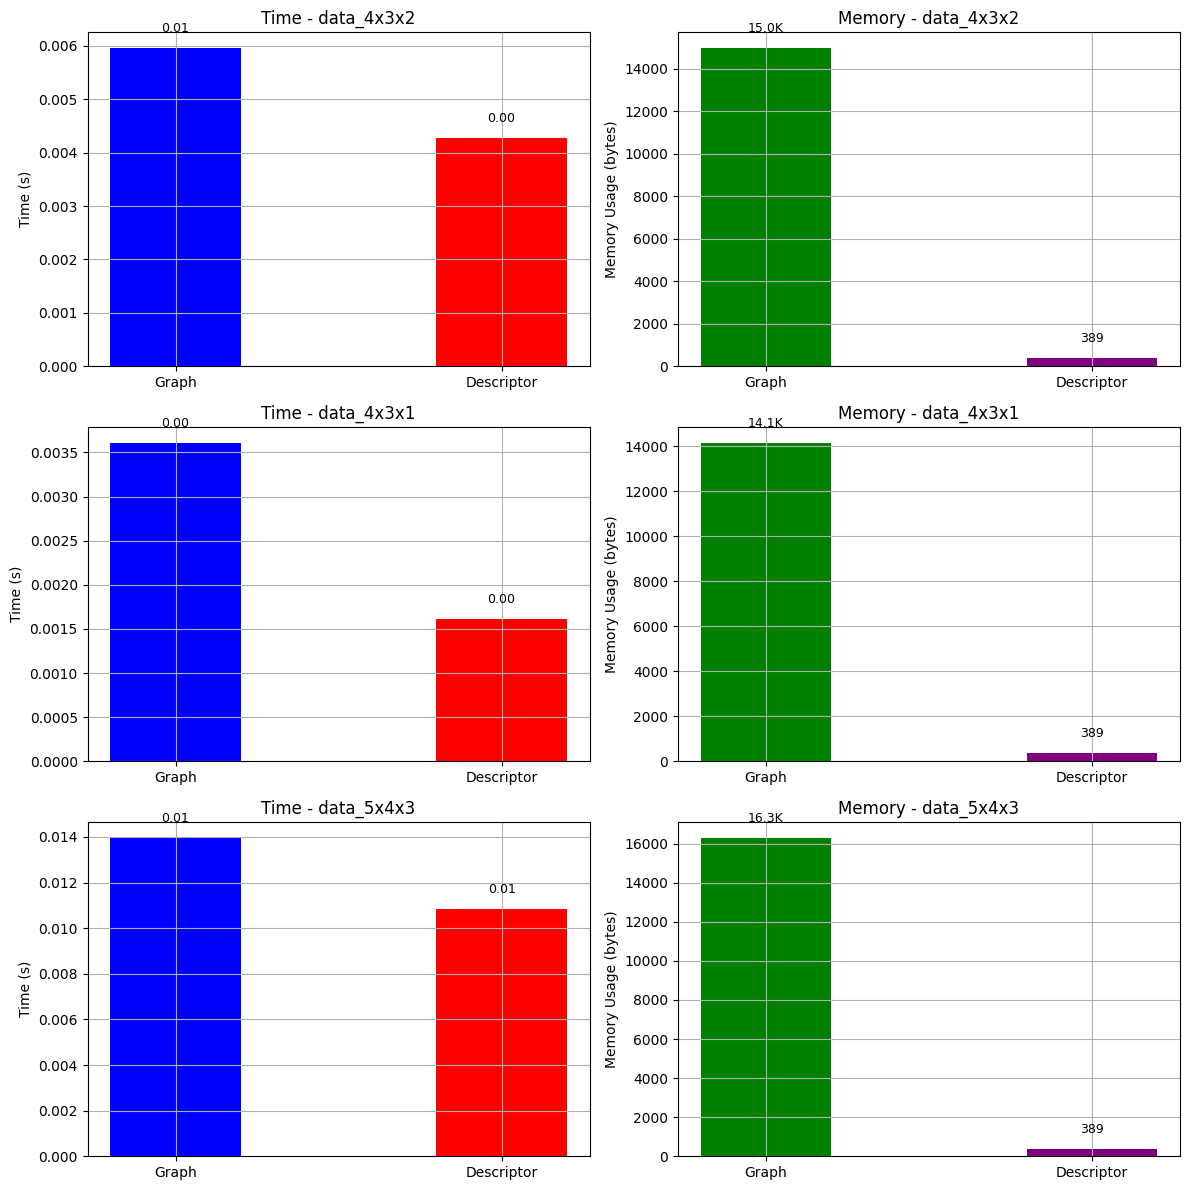

In [11]:
plot_total_execution_and_memory("stats.csv")
plot_stepwise_execution_and_memory("stats.csv")

## Graph Comparison

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict

def extract_numbers(filename):
    """ 파일명에서 숫자를 추출하여 정렬을 위한 키를 생성 """
    return tuple(map(int, re.findall(r'\d+', filename)))


def plot_total_execution_and_memory_compare(csv_file1, csv_file2):
    df1 = pd.read_csv(csv_file1)
    df2 = pd.read_csv(csv_file2)
    
    df1['total_execution_time'] = df1['descriptor_time'] + df1['graph_time']
    df1['peak_memory_usage'] = df1[['graph_mem', 'descriptor_mem']].max(axis=1)
    
    df2['total_execution_time'] = df2['descriptor_time'] + df2['graph_time']
    df2['peak_memory_usage'] = df2[['graph_mem', 'descriptor_mem']].max(axis=1)
    
    pattern_groups = group_files_by_pattern(df1['Test File'])
    
    for pattern, files in pattern_groups.items():
        subset1 = df1[df1['Test File'].isin(files)].copy()
        subset2 = df2[df2['Test File'].isin(files)].copy()
        
        subset1['sort_key'] = subset1['Test File'].apply(extract_numbers)
        subset2['sort_key'] = subset2['Test File'].apply(extract_numbers)
        subset1.sort_values('sort_key', inplace=True)
        subset2.sort_values('sort_key', inplace=True)
        
        sorted_test_files = sorted(files, key=extract_numbers)
        
        plt.figure(figsize=(12, 10))
        
        ax1 = plt.subplot(2, 1, 1)
        ax1.plot(sorted_test_files, subset1['total_execution_time'], marker='o', linestyle='-', color='blue', label=f'{csv_file1} Execution Time')
        ax1.plot(sorted_test_files, subset2['total_execution_time'], marker='o', linestyle='-', color='red', label=f'{csv_file2} Execution Time')
        plt.xlabel('Test Files')
        plt.ylabel('Time (s)')
        plt.title(f'Total Execution Time Comparison - {pattern}')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.grid(True)
        
        ax2 = plt.subplot(2, 1, 2)
        ax2.plot(sorted_test_files, subset1['peak_memory_usage'], marker='s', linestyle='-', color='green', label=f'{csv_file1} Memory Usage')
        ax2.plot(sorted_test_files, subset2['peak_memory_usage'], marker='s', linestyle='-', color='purple', label=f'{csv_file2} Memory Usage')
        plt.xlabel('Test Files')
        plt.ylabel('Memory Usage (bytes)')
        plt.title(f'Peak Memory Usage Comparison - {pattern}')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout(pad=2.0)
        plt.show()


def plot_stepwise_execution_and_memory_compare(csv_file1, csv_file2):
    df1 = pd.read_csv(csv_file1)
    df2 = pd.read_csv(csv_file2)
    
    pattern_groups = group_files_by_pattern(df1['Test File'])
    
    for pattern, files in pattern_groups.items():
        subset1 = df1[df1['Test File'].isin(files)].copy()
        subset2 = df2[df2['Test File'].isin(files)].copy()
        subset1['size'] = subset1['Test File'].str.extract(r'(\d+)').astype(float)
        subset2['size'] = subset2['Test File'].str.extract(r'(\d+)').astype(float)
        subset1.sort_values('size', inplace=True)
        subset2.sort_values('size', inplace=True)
        
        num_files = len(subset1)
        cols = 2
        rows = num_files  
        
        fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4), squeeze=False)
        
        bar_width = 0.4
        
        for i, ((_, row1), (_, row2)) in enumerate(zip(subset1.iterrows(), subset2.iterrows())):
            row_idx = i  
            col_idx = 0  
            
            ax_time = axes[row_idx, col_idx]
            x = np.array([0, 1])  
            times1 = [row1['graph_time'], row1['descriptor_time']]
            times2 = [row2['graph_time'], row2['descriptor_time']]
            
            ax_time.bar(x - 0.2, times1, bar_width, color=['blue', 'red'], label=csv_file1)
            ax_time.bar(x + 0.2, times2, bar_width, color=['cyan', 'orange'], label=csv_file2)
            
            ax_time.set_xticks(x)
            ax_time.set_xticklabels(['Graph', 'Descriptor'])
            ax_time.set_title(f'Time - {row1["Test File"]}')
            ax_time.set_ylabel('Time (s)')
            ax_time.legend()
            ax_time.grid(True)
            
            col_idx = 1  
            ax_mem = axes[row_idx, col_idx]
            mems1 = [row1['graph_mem'], row1['descriptor_mem']]
            mems2 = [row2['graph_mem'], row2['descriptor_mem']]
            
            ax_mem.bar(x - 0.2, mems1, bar_width, color=['green', 'purple'], label=csv_file1)
            ax_mem.bar(x + 0.2, mems2, bar_width, color=['lightgreen', 'pink'], label=csv_file2)
            
            ax_mem.set_xticks(x)
            ax_mem.set_xticklabels(['Graph', 'Descriptor'])
            ax_mem.set_title(f'Memory - {row1["Test File"]}')
            ax_mem.set_ylabel('Memory Usage (bytes)')
            ax_mem.legend()
            ax_mem.grid(True)
        
        plt.tight_layout()
        plt.show()


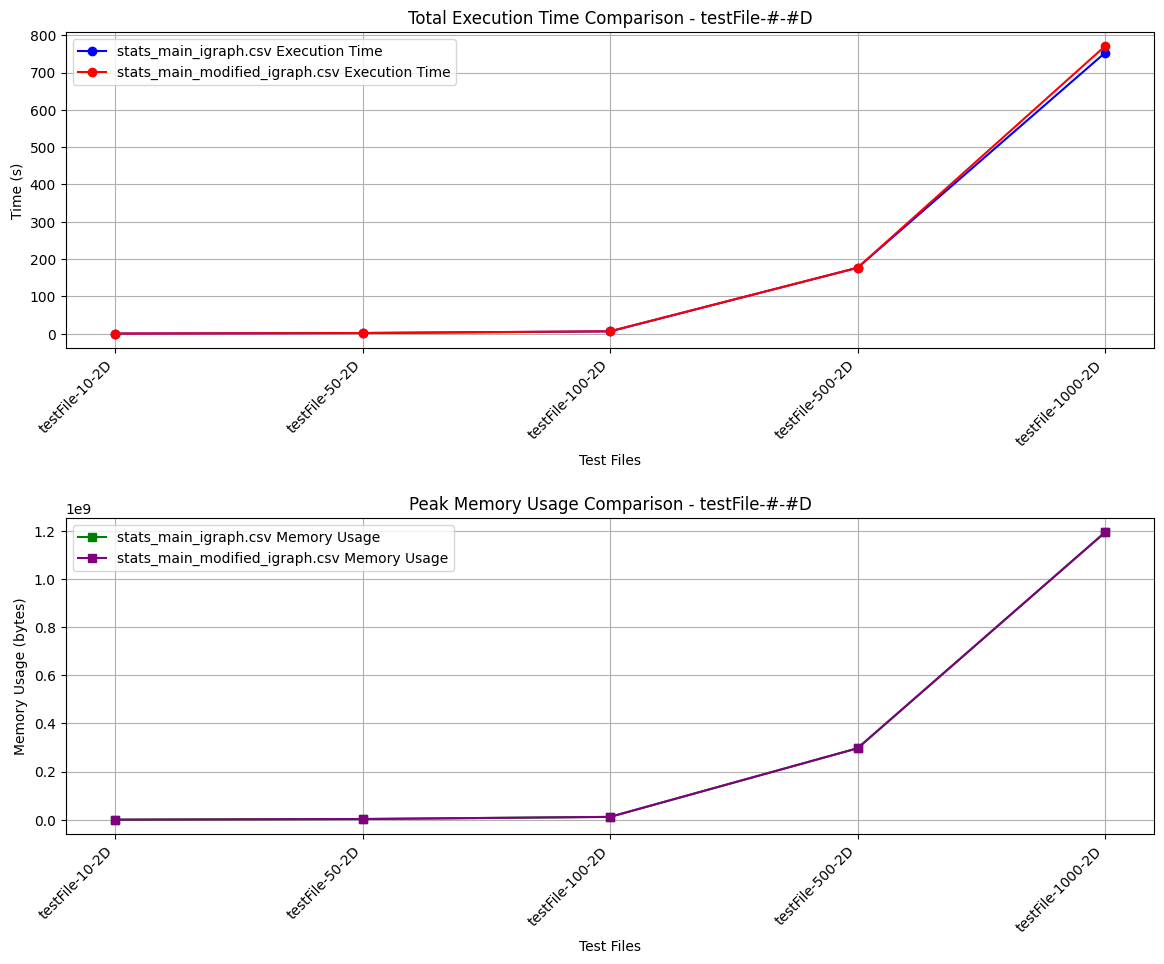

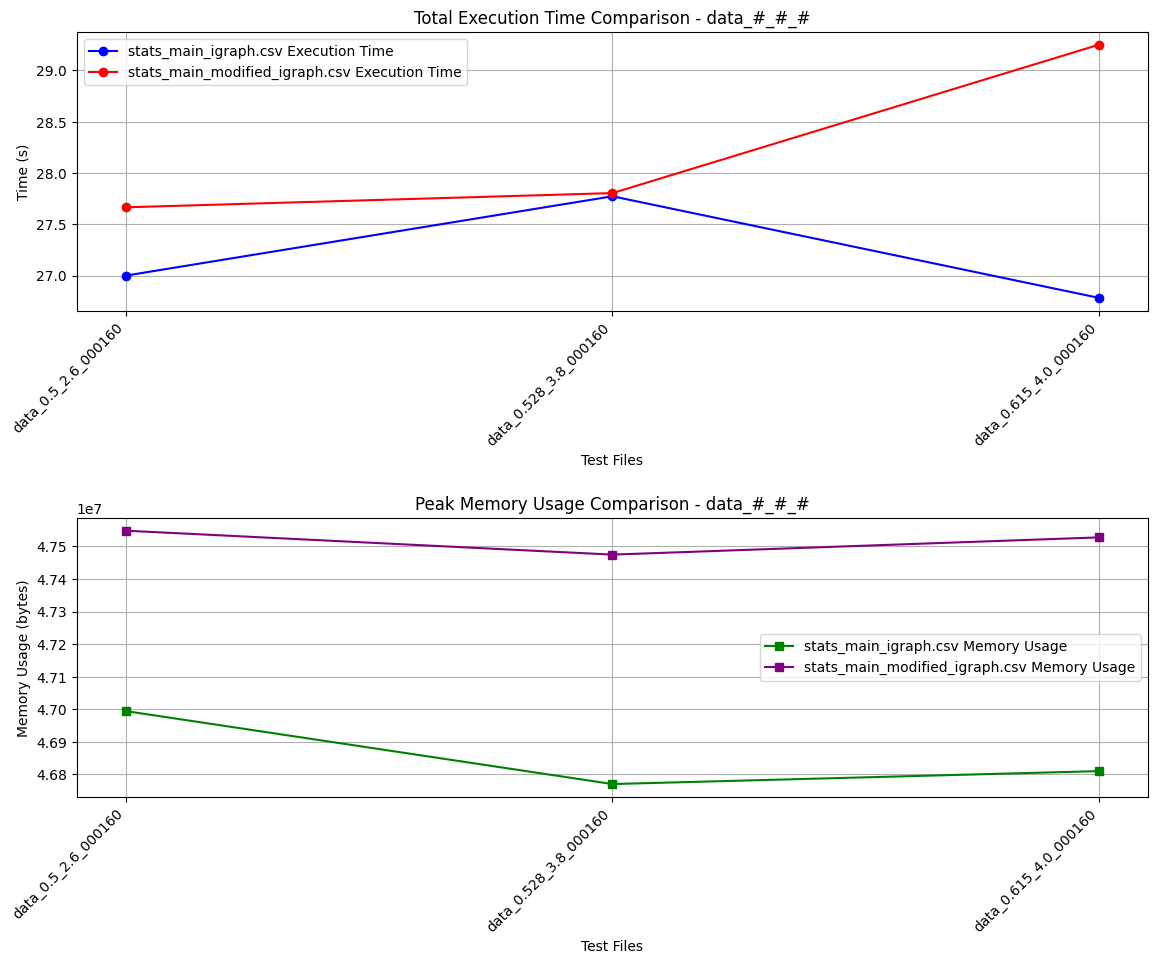

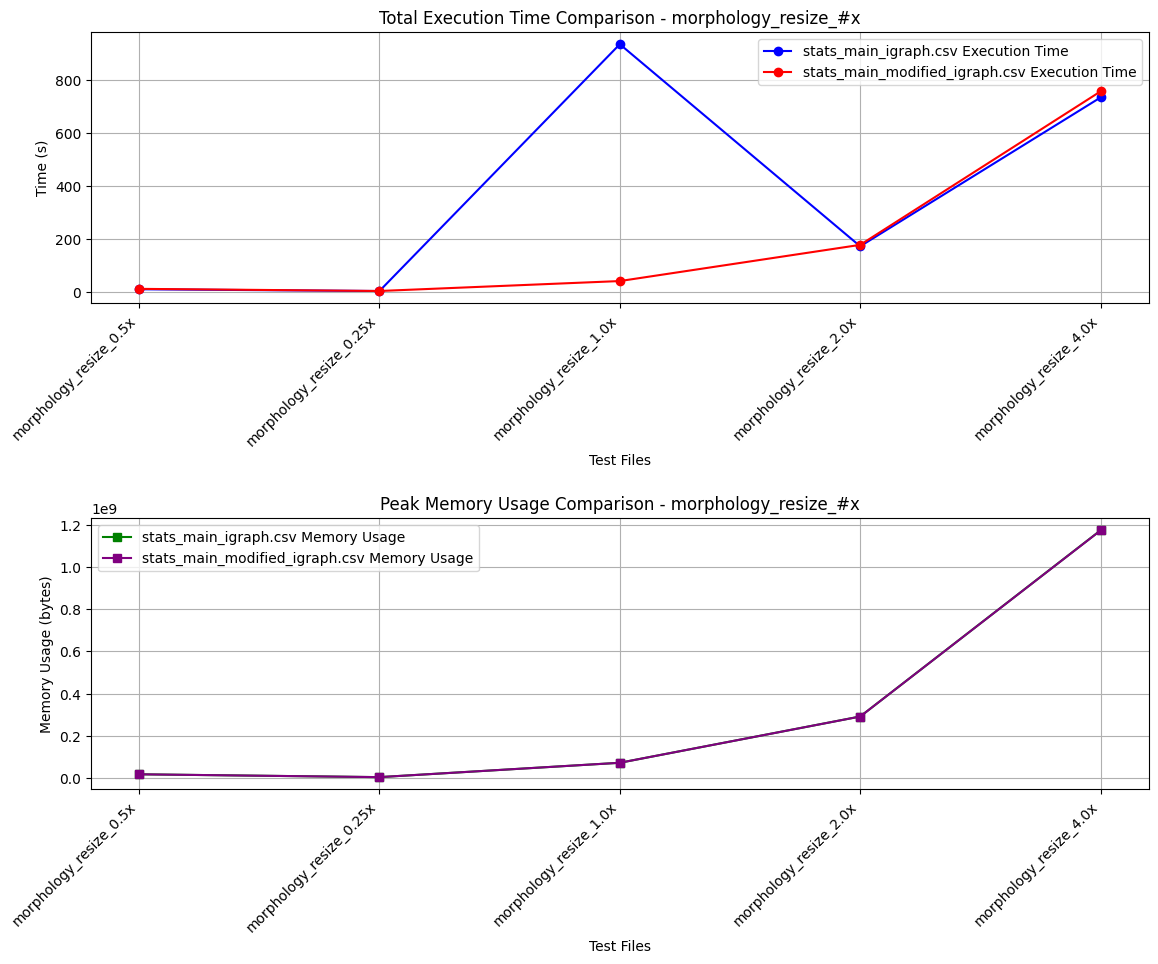

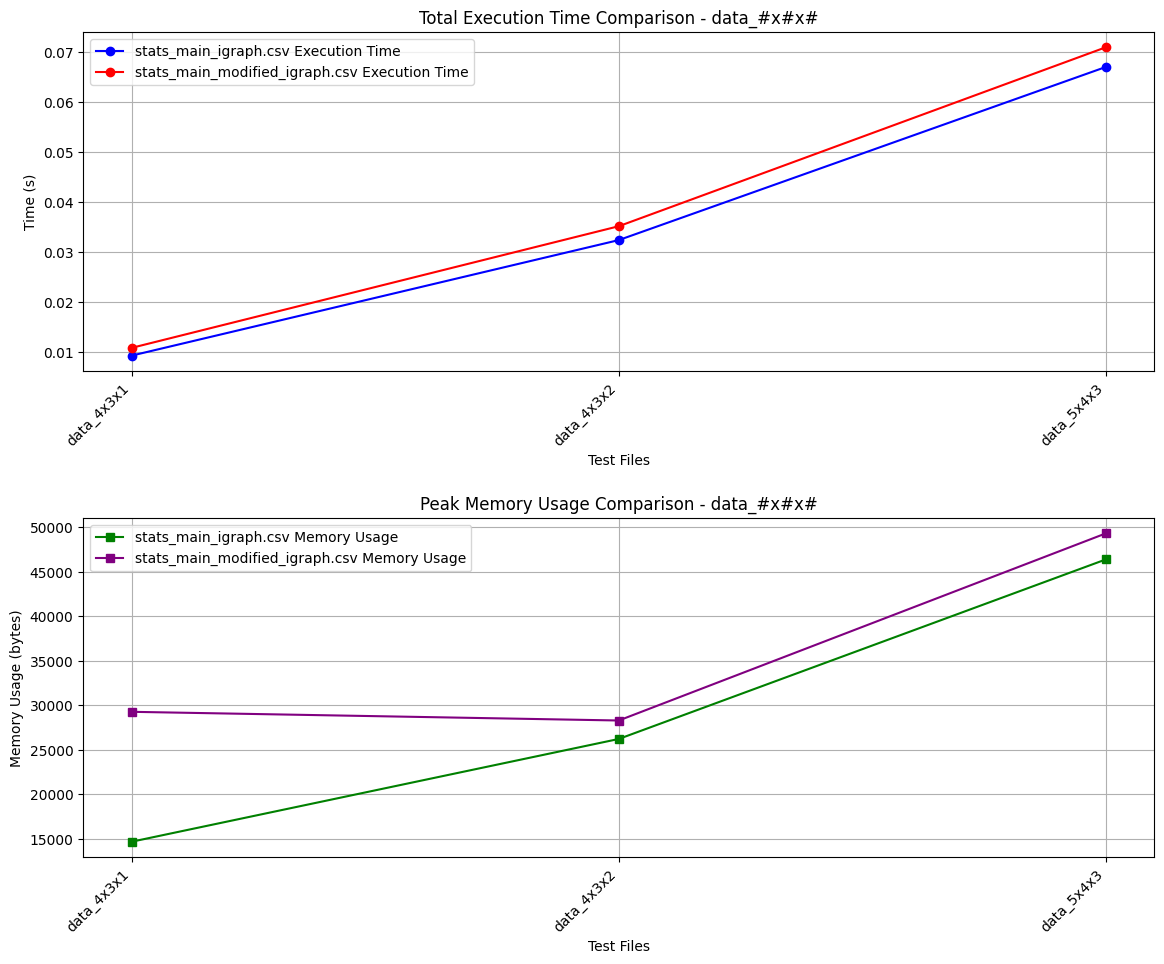

In [17]:
plot_total_execution_and_memory_compare('stats_main_igraph.csv', 'stats_main_modified_igraph.csv')

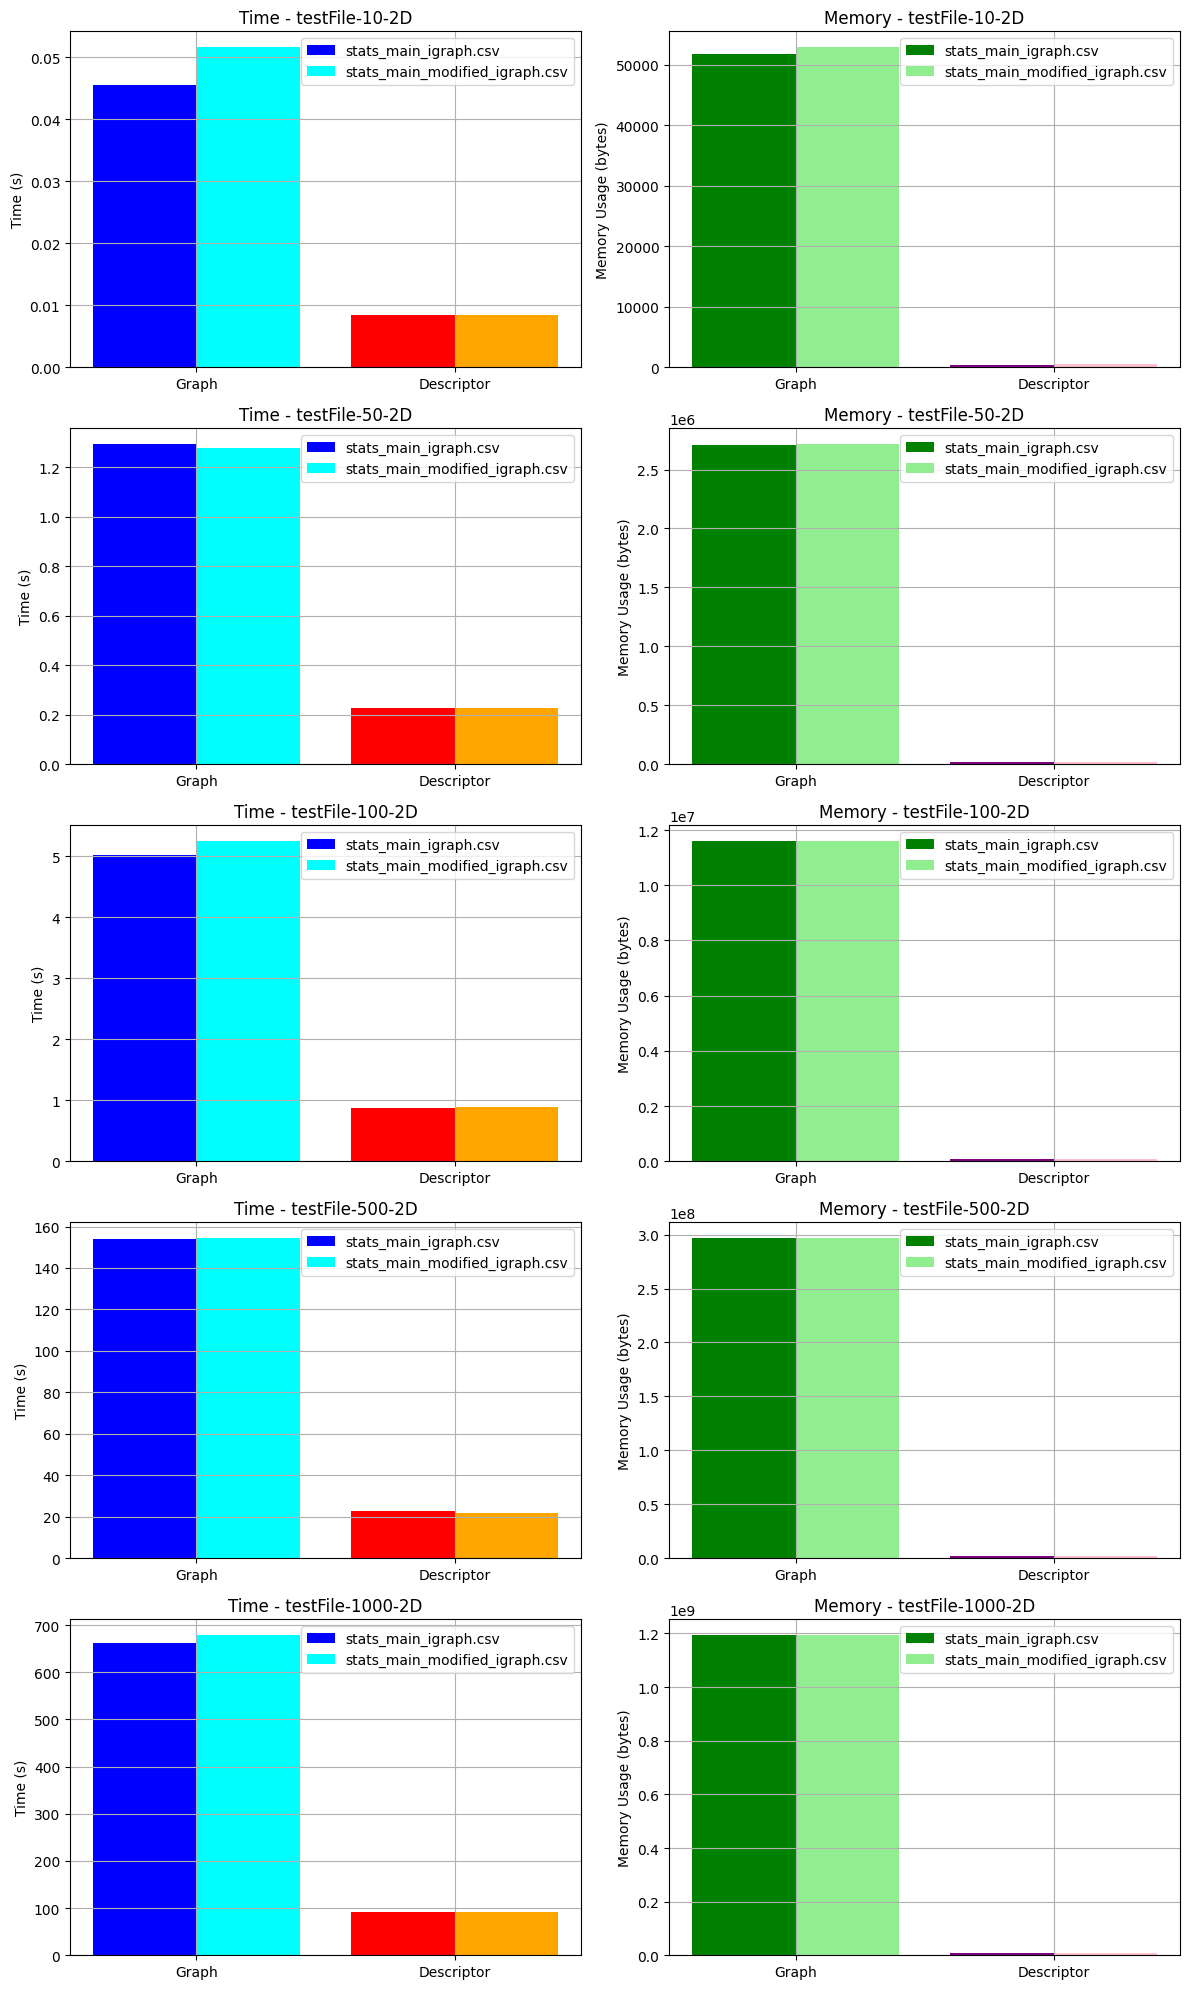

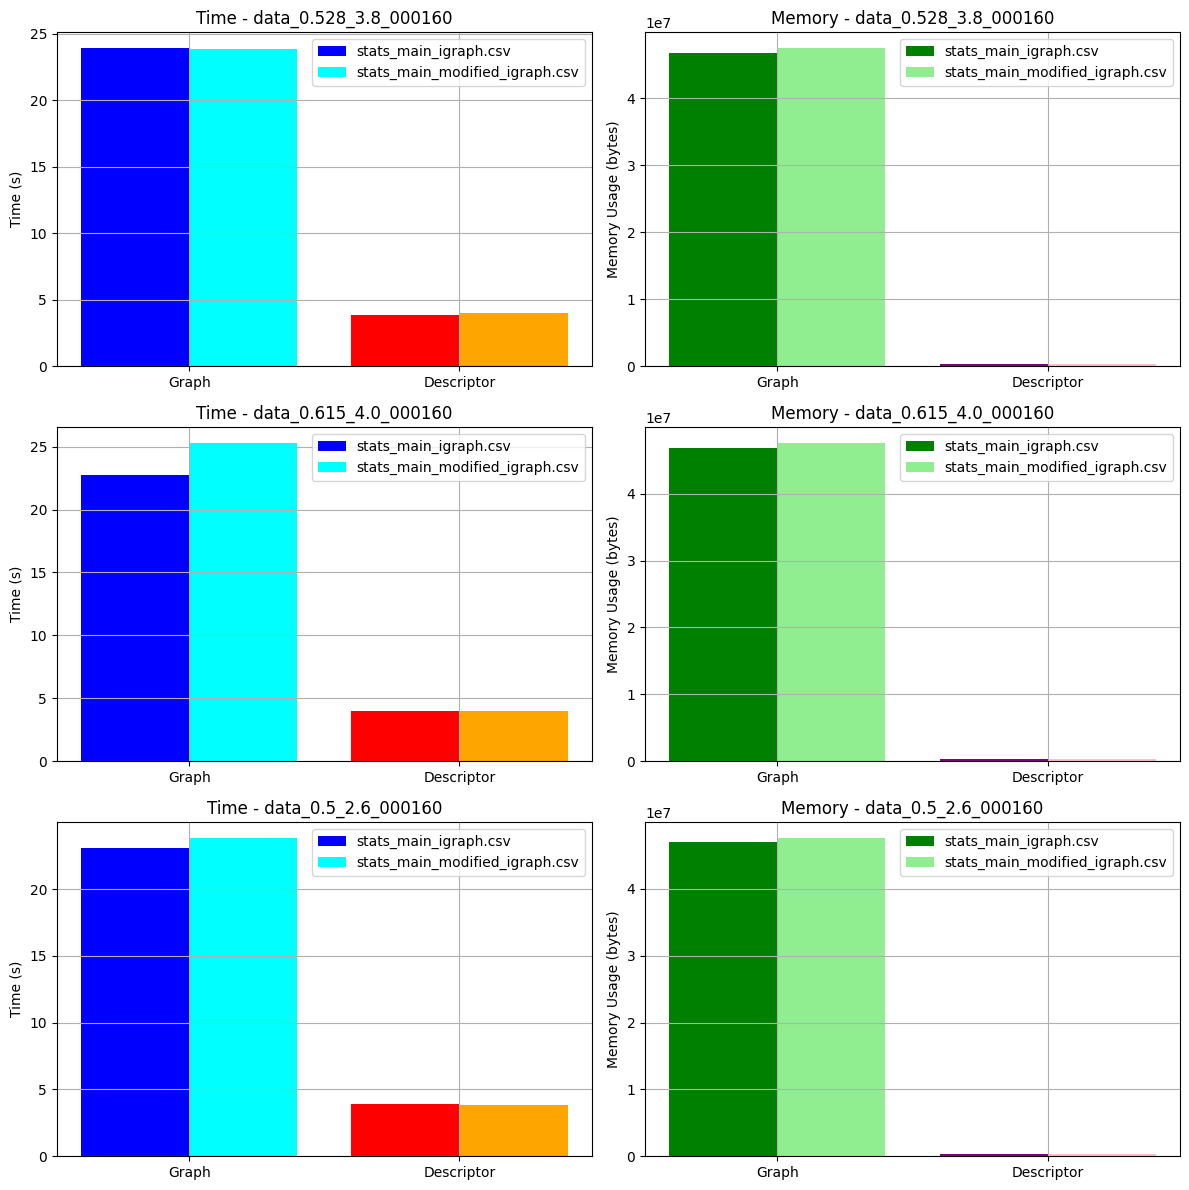

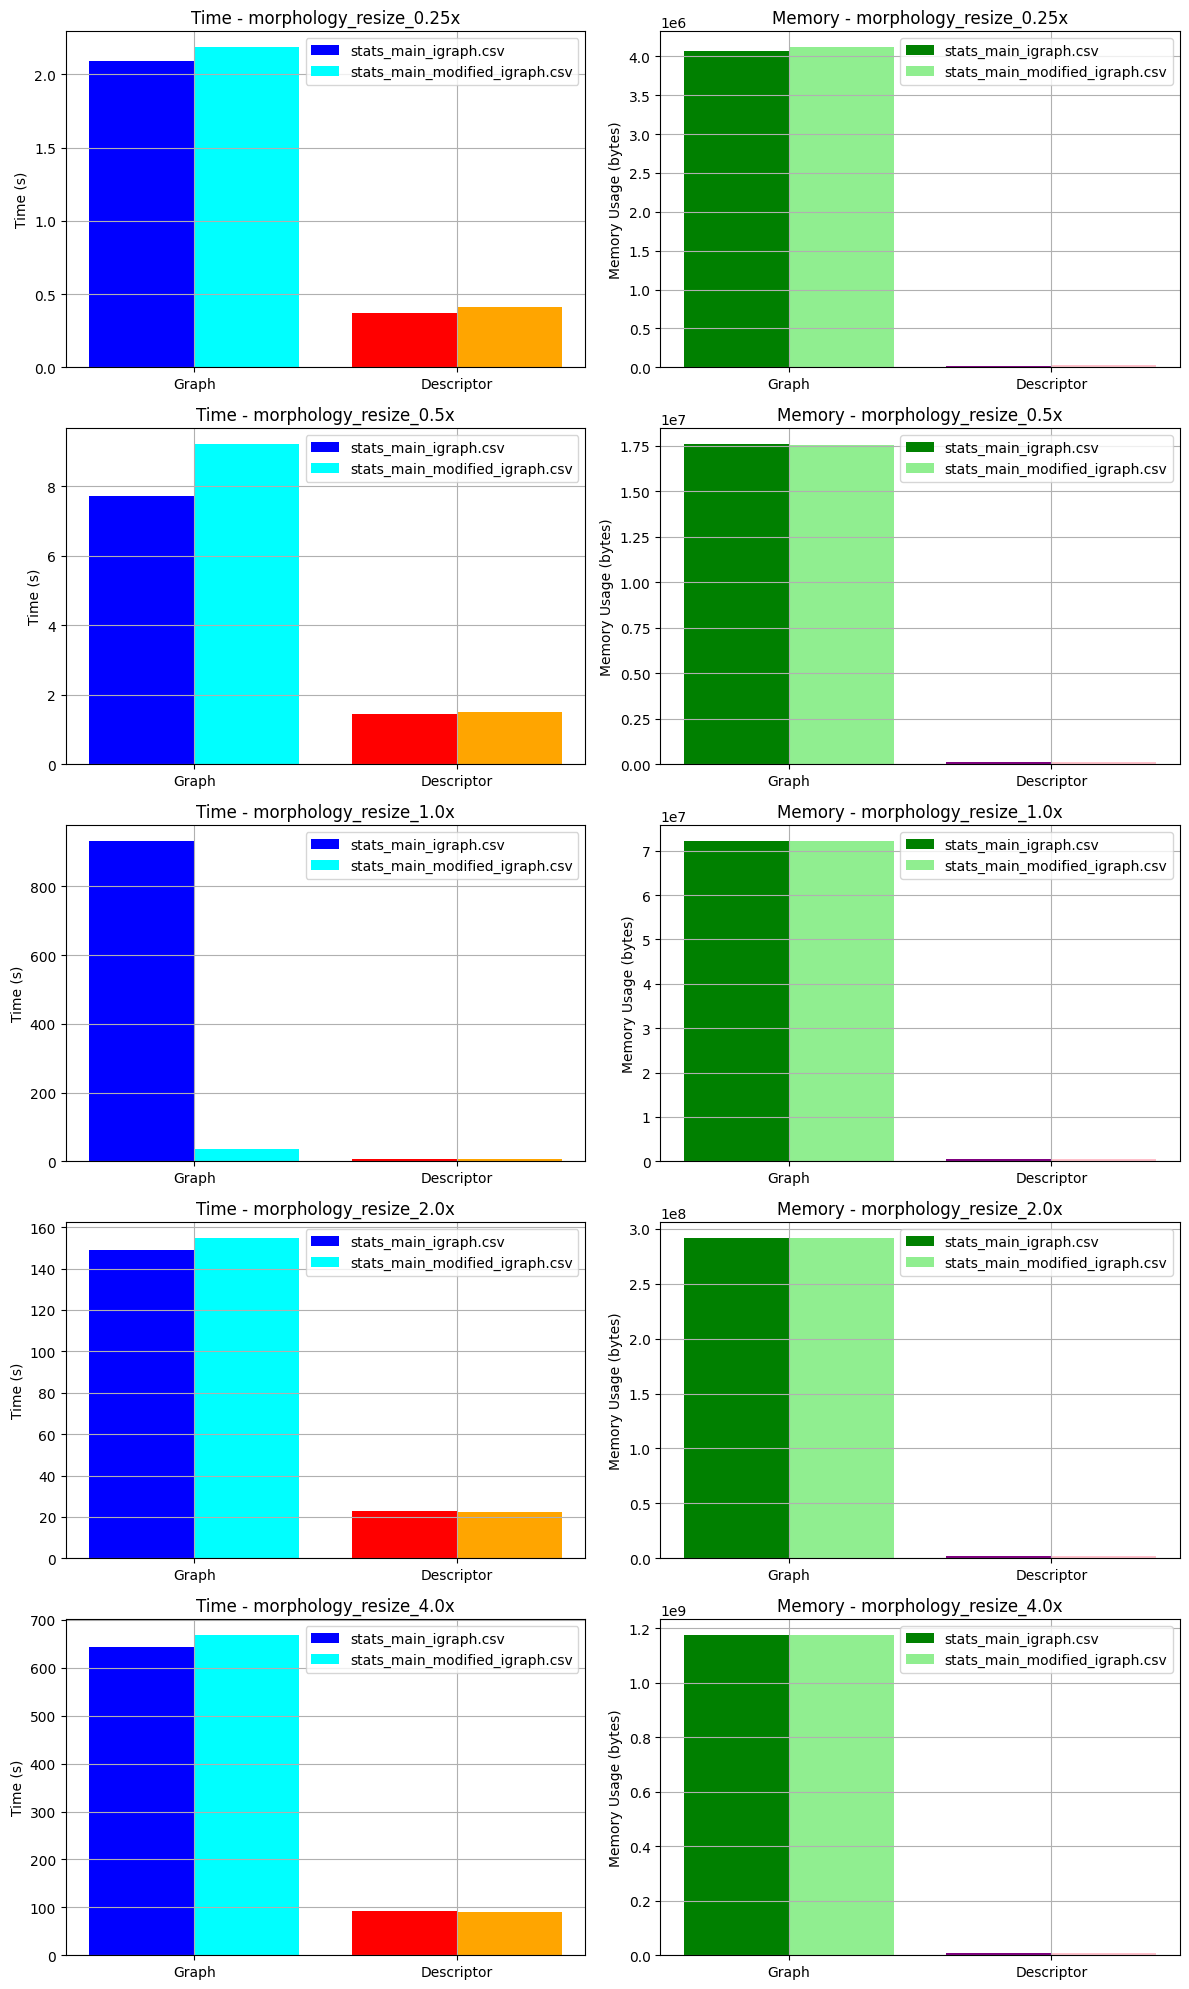

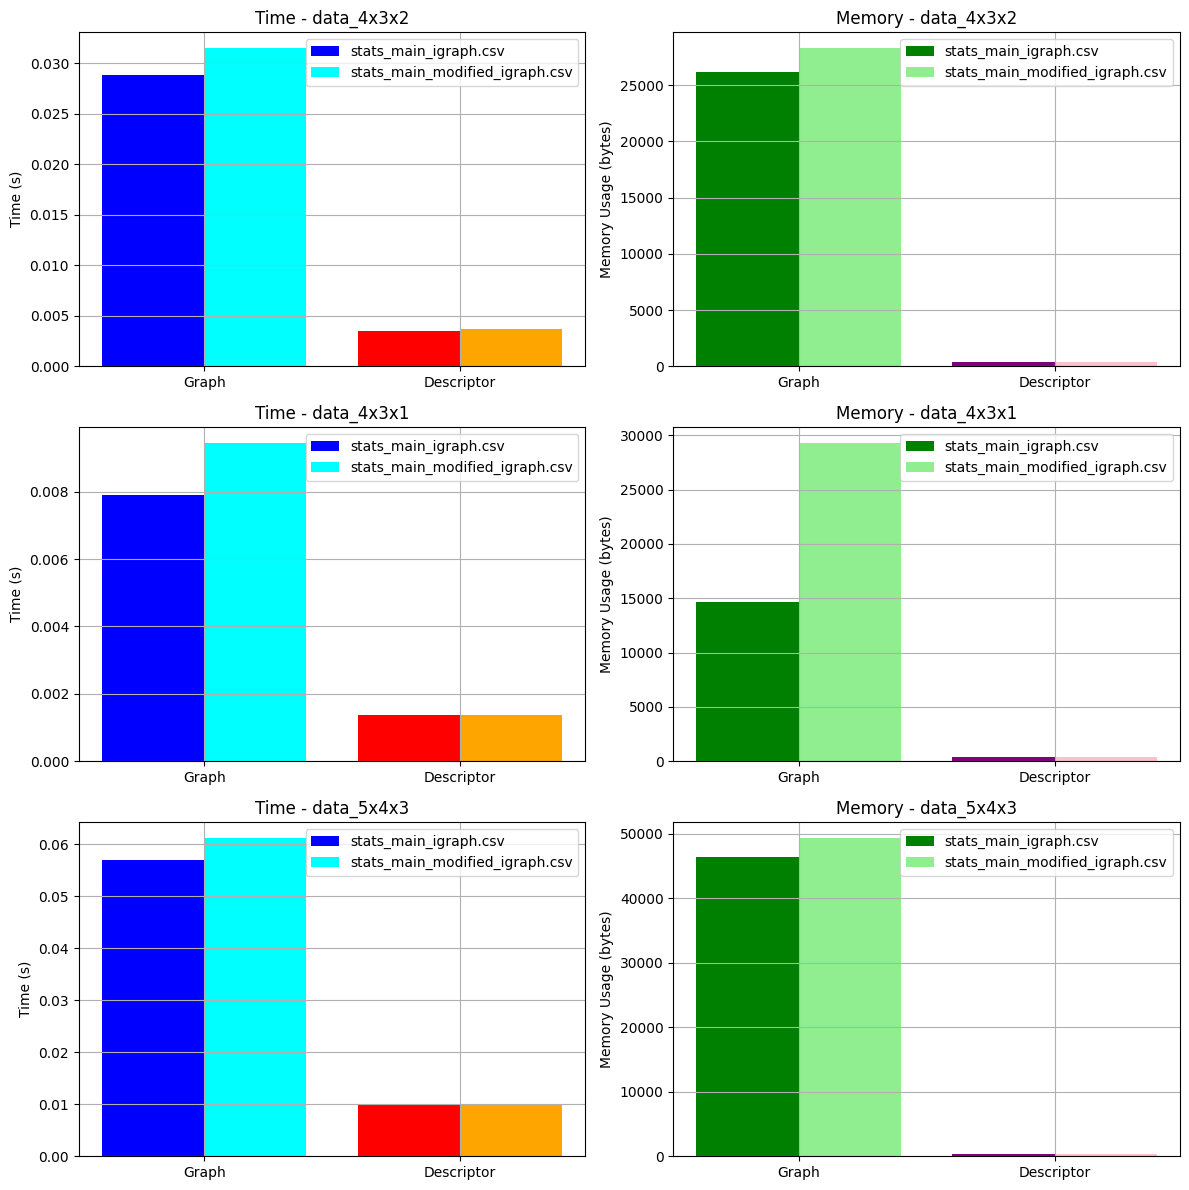

In [19]:
plot_stepwise_execution_and_memory_compare('stats_main_igraph.csv', 'stats_main_modified_igraph.csv')